## SOFT MATTER - FINAL WORK
Author: Margot Inés Paco Chipana

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
natom = np.loadtxt("water3/trajectory500.xyz", dtype=int,max_rows=1)
natom

array(2704)

In [3]:
delta = natom+2
frames = 500
data_frame=[]

In [4]:
for i in range(frames):
    data_frame.append(np.loadtxt("water3/trajectory500.xyz", dtype={'names':('atom','x','y','z'), 'formats':('S3','f8','f8','f8')}, skiprows=2+(delta*i),max_rows=natom))

In [5]:
#data_frame
#data_frame[0]['atom']

In [6]:
def module(vector):
    return np.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)

In [7]:
def unit_vect(vector):
    modul = module(vector)
    if modul != 0:
        return [vector[0] / modul, vector[1] / modul, vector[2] / modul]
    else:
        return [0, 0, 0]

In [19]:
def direct_vdipol(data_frame,f):
    """
    input
    -----
    data_frame : type list ('atom', 'S3'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), required
        Trajectory of all water molecules.
    f : int, required 
        Number of frame.
    output
    ------
    mu : list (array 3D), required
        Direction of the water
    """
    mu=[]
    for element in data_frame[f]:
        atom = element['atom']
        if atom == b'OH2':
            x1 = element['x']; y1 = element['y']; z1 = element['z']
            #print(f"Atom: {atom}, x: {x}, y: {y}, z: {z}")
        if atom == b'H1':
            x2 = element['x']; y2 = element['y']; z2 = element['z']
        if atom == b'H2':
            x3 = element['x']; y3 = element['y']; z3 = element['z']
            
            #vectors components
            vector1 = [x2 - x1, y2 - y1, z2 - z1]
            vector2 = [x3 - x1, y3 - y1, z3 - z1]
            #resultant vector
            resultant = [vector1[0]+vector2[0], vector1[1]+vector2[1], vector1[2]+vector2[2]]
            #resultant unit vector
            resultant_unit_vect = unit_vect(resultant)
            mu.append(resultant_unit_vect)
    return np.array(mu)

In [9]:
file=open('water3.dat','w')

In [10]:
C1=direct_vdipol(data_frame,0)
nmol = len(C1)
average = []
for j in range(frames):
    prod_esc=[]
    C2=direct_vdipol(data_frame,j)
    for k in range(nmol):
        #print(C2[k]@C1[k])
        prod_esc.append(C2[k]@C1[k])
    average.append(np.mean(prod_esc))

In [11]:
y=average[::25]
x=np.linspace(0,10,20)

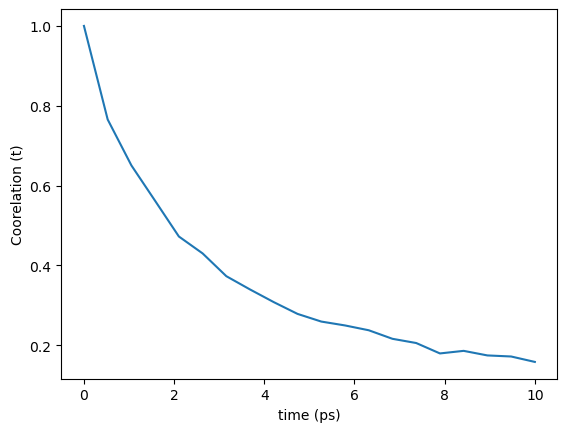

In [18]:
plt.plot(x,y)
plt.xlabel('time (ps)')
plt.ylabel('Coorelation (t)') #coorelation function of water molecules located at distances from the membrane
plt.show()

In [13]:
for i in range(len(x)):
    file.write('%14.8f %14.8f\n'%(x[i],y[i]))
file.close()